In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
MEASUREMENT=Base.classes.measurement
STATION = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(MEASUREMENT.date).order_by(MEASUREMENT.date.desc()).first()

('2017-08-23')

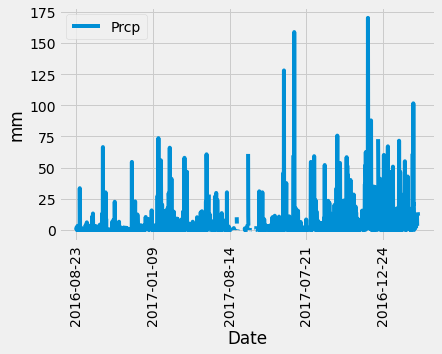

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(MEASUREMENT.date).order_by(MEASUREMENT.date.desc()).first()
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

prcp_query_result=session.query(MEASUREMENT.date, MEASUREMENT.prcp).filter(MEASUREMENT.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_query_result, columns=['Date','Prcp'])

#Sort the dataframe by date
prcp_df = prcp_df.sort_index()
prcp_df
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.set_index(prcp_df["Date"], inplace=True)

prcp_df.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_count_result=session.query(STATION.station).count()
station_count_result

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# METHOD COPIED from below link, detail has change to fit in this challenge
# https://github.com/MThorpester/sqlalchemy-challenge/blob/main/climate_analysis.ipynb
sel=[MEASUREMENT.station,func.count(MEASUREMENT.date)]
most_active = session.query(*sel).\
    group_by(MEASUREMENT.station).\
    order_by(func.count(MEASUREMENT.date).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel2 = [MEASUREMENT.station,
        func.min(MEASUREMENT.tobs),
        func.max(MEASUREMENT.tobs),
        func.avg(MEASUREMENT.tobs)]
active_station_info = session.query(*sel2).\
     filter(MEASUREMENT.station == 'USC00519281').all()

active_station_info

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

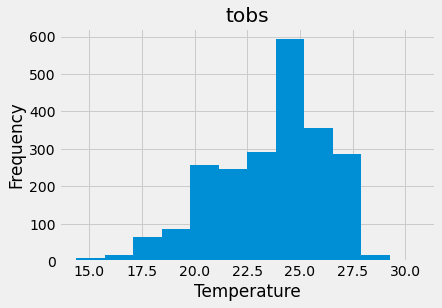

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel3 = [MEASUREMENT.id,
        MEASUREMENT.date,
        MEASUREMENT.station,
        MEASUREMENT.tobs
       ]
last_12months_info = session.query(*sel3).\
     filter(MEASUREMENT.date >= year_ago).all()      

last_12months_info_df = pd.DataFrame(last_12months_info)
last_12months_info_df

# Referred documentatiton https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
last_12months_info_df.hist(column='tobs',bins=12,label="TOBS")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()